<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 5: Data Processing & Cleaning for Data Science: Data Ingestion and Wrangling with Pandas

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Ingestion and Wrangling with Pandas. It provides a set of practical Training challenges that allow grasping the different concepts presented in the lecture 5.

## Challenge 1
1. Connect to the `chinook.db` sqlite3 database available in the folder data.
2. Find the genre names with the longest average song length.

`Hint:`
join the tables with the genre name and song length and use the SQLite aggregate
function for the average along with a GROUP BY clause.


In [24]:
import sqlite3

conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()
query = """
SELECT g.Name AS genre_name, AVG(t.Milliseconds) AS avg_song_length
FROM genres g
JOIN tracks t ON g.GenreId = t.GenreId
GROUP BY g.Name
ORDER BY avg_song_length DESC
LIMIT 1;  
"""
cursor.execute(query)

result = cursor.fetchone()
if result:
    print(f"Genre avec la durée moyenne des chansons la plus longue: {result[0]} - Durée moyenne: {result[1] / 1000:.2f} secondes")
else:
    print("Aucun résultat trouvé.")

cursor.close()
conn.close()


('Sci Fi & Fantasy', 2911783.0384615385)
Genre avec la durée moyenne des chansons la plus longue: Sci Fi & Fantasy - Durée moyenne: 2911.78 secondes


## Challenge 2: Ingesting, Wrangling and Analyzing  iTune data

You've started a new data science position at the iTune department at Apple Company. 
The department wants to build, test, and evaluate new machine learning recommendation song models using a different source of data: in Excel file, in a csv file, and in the chinook.db SQLite database. They want you proceed with the data ingsestion and data wrangling procedures to provide a clean dataset to be used later for their machine learning based recommendation songs models.  

1. They particlarly asked you to load, clean, and analyze, and then deliver your results to the executive team and president.
You should deliver a small summary of your EDA work from pandas and save your cleaned and prepared data as a new Excel file. The data files are `chinook_data.xlsx`, `chinook_data.csv`, and `chinook.db` on the data folder existed within this notebook.

`Hint:`
1. Follow the procedures in Lecture 5 - Slides: 13-17 - For data ingestion (Data loading from different sources).

2. Follow and test the procedures in Lecture 5 - Slides:18-22 - For Basic Exploratory Data Analysis (EDA).

3. Follow and test the procedures in Lecture 5 - Slides:23-27 - For Basic Data Cleaning Operations.

4. To save your cleaned dataset in an excel file use the pandas built-in method: `pandas.DataFrame.to_excel`.


In [46]:
import pandas as pd
import sqlite3
itunes_df_excel = pd.read_excel('chinook_data.xlsx')

itunes_df_csv = pd.read_csv('chinook_data.csv')


connection = sqlite3.connect('chinook.db')


itunes_df_db = pd.read_sql_query("SELECT * FROM tracks;", connection)

connection.close()

print(itunes_df_excel.head())
print(itunes_df_excel.info())
print(itunes_df_excel.describe())

# EDA pour le DataFrame CSV
print(itunes_df_csv.head())
print(itunes_df_csv.info())
print(itunes_df_csv.describe())


# EDA pour le DataFrame CSV
print(itunes_df_db.head())
print(itunes_df_db.info())
print(itunes_df_db.describe())

itunes_df_excel.drop(columns=['Composer'], inplace=True)
itunes_df_excel.dropna(thresh=2, inplace=True)
only_music = itunes_df_excel[~itunes_df_excel['Genre'].isin(['Drama', 'TV Shows', 'Sci Fi & Fantasy', 'Science Fiction', 'Comedy'])]
itunes_df_csv.dropna(inplace=True)
itunes_df_db.dropna(thresh=2, inplace=True)

merged_df = pd.concat([itunes_df_excel, itunes_df_csv, itunes_df_db], ignore_index=True)

output_file_path = 'cleaned_itunes_data.xlsx'
merged_df.to_excel(output_file_path, index=False)




                  Track                                    Composer  \
0  My Time After Awhile  Robert Geddins/Ron Badger/Sheldon Feinberg   
1   Be Quick Or Be Dead                 Bruce Dickinson/Janick Gers   
2           Água E Fogo   Chico Amaral/Edgard Scandurra/Samuel Rosa   
3            Ozone Baby                    Jimmy Page, Robert Plant   
4            Bop Boogie                                         NaN   

   Milliseconds    Bytes  UnitPrice  Genre  \
0        182491  6022698       0.99  Blues   
1        204512  8181888       0.99   Rock   
2        278987  9272272       0.99   Rock   
3        215954  7079588       0.99   Rock   
4        189596  6093124       0.99   Jazz   

                                              Album        Artist  
0  The Best Of Buddy Guy - The Millenium Collection     Buddy Guy  
1                                  Fear Of The Dark   Iron Maiden  
2                                       Maquinarama         Skank  
3                       

## Challenge 3: Ingesting, Wrangling and Analyzing Bitcoin price data


You have just joined a financial company as a new data scientist. The company is  interested in the Bitcon market and you are working with a team that aims to ingest data and then clean, and analyse the final dataset to be used later to build and evaluate machine learning models for Bitcon Price forecasting.

The company is working with two datasets coming from two different sources and is only interested in the `BTCUSD` currency: 
1. One dataset is json file locally existed in the data folder: `bitcoin_price.json`. This file contains data up to `2020-11-27`
2. The other uses a real time data flow that comes from yahoo finance api service. The company wants to collect real time data beginning from `2020-11-28` to `2022-10-31`.

You are asked to do the required checklist procedures and operations to load, clean, and analyse, and then deliver your results to the executive team with providing a short summaray of your prelimanary EDA work from pandas and save the cleaner dataset as a new csv file. 
Note that the 

`Hint:`

1. To load a json file into a dataframe use the snipet code below:

```python
import json

with open('<path_to_your_json_file>') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)
```

This code uses the `json` built-in python module to open a json file and load it in an object data. Then we use the `from_dict()` pandas method to transform the json data into a DataFrame.

2. To get real time data flow from the yahoo finance api sevice we will use the `yfinance` module. 
    * So, first install the module in your environment using  `conda install yfinance`.
    * Then use the code below to get real data. Test with the periode from `2020-01-01` to `2024-10-31`.

```python
import yfinance as yf

btc_yf_df = yf.download('BTC-USD', # The currency we are intersted in
                   start='<start_date>', # The starting date
                   end='<end_date>', # The starting date
                   interval='1d' # The frequency of collecting the data. here 1 day
                  )
```

3. Get a look of the two DataFrames and see what are the common columns and what differ one to another.
    * You will notice that the  json DataFrame is indexed numericaly wherease the yahoo DataFrame is indexed by Date. So, you have to uniform the index for both DataFrames. In this case we will change the json DataFrame  index by Date.
        1. To do that, first rename the column `time` to `Date` by using the built-in pandas method: `rename()` as follows:
        
        ```python
        rename(columns ={'<old_col_name>':'<new_col_name>'}, inplace = True)
         ```
         
        2. What is the datatype of the new Date column in the json DataFrame?
            * You will notice that it is a `datetime64[ns]` datatype, which means the number of seconds since 1-1-1970. To make it date fomat like the yahoo DataFrame, convert the column to a pandas datetime datatype by using the following code: 
         
          ```python
              btc_df['<column_name>'] = pd.to_datetime(btc_df['<column_name>'], unit='ms')
          ```
         
        3. To change the index of your dataframe use the `set_index` built-in pandas function:
        ```python
              set_index('<column_name>', inplace=True)
        ```
            * The remaining common columns labels in both DataFrames are not uniformed. The json DataFrame uses lowercase strings,  while the yahoo DataFrame uses a first letter world uppercase string.
                  1. Change the column labels of the yahoo DataFrame to lowercase strings. Adjust the following code accordingly:
             ```python
                data_frame.columns= data_frame.columns.str.lower()
             ```
             
4. Concatenate the two dataframe into one dataset.
5. Do The basic EDA cheklist procedures on the resulting dataset:
   * Do few time series plots: 
       * open, close, high, low, volume with regards to Date
   * Print the correlation matrix.
6. Do the General Data Cleaning Checklist operations to see if ther is still cleaning operations to accomplish.
    * Most particularly, you will notice a NaN values in both `adj close` and `symbole` columns. What is your suggestion to deal with this missing values given that the company is not interest at all on the `adj close` data. 	
7. Save your cleaner dataframe into a csv file.
    * Use the `pandas.DataFrame.to_csv` method.
             

In [67]:
import yfinance as yf
import pandas as pd
import json

with open('bitcoin_price.json') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)
btc_yf_df=yf.download('BTC-USD', # The currency we are interested in
            start='2020-01-01', # The starting date
            end='2024-10-31', # The ending date
            interval='1d' # The frequency of collecting the data, here 1 day
           )
btc_df_jsn.rename(columns ={'time':'Date'}, inplace = True)
btc_df_jsn['Date'] = pd.to_datetime(btc_df_jsn['Date'], unit='ms')
btc_df_jsn.set_index('Date', inplace=True)       
btc_yf_df.columns = [col[0].strip().lower() for col in btc_yf_df.columns]
btc_yf_df['volume'] =btc_yf_df['volume'].astype(float)
btc_combined = pd.concat([btc_df_jsn, btc_yf_df], ignore_index=False)



print("Valeurs manquantes avant nettoyage :")
print(btc_combined.isna().sum())
print('----------------------------------------------------------------------------------------------------------------')
btc_combined = btc_combined.drop(columns=['adj close'])

# btc_combined = btc_combined.dropna(subset=['symbol'])


btc_combined['symbol'].fillna('Unknown', inplace=True)
print('----------------------------------------------------------------------------------------------------------------')

print("Valeurs manquantes après nettoyage :")
print(btc_combined.isna().sum())
print('----------------------------------------------------------------------------------------------------------------')

print(btc_combined.head())
print('----------------------------------------------------------------------------------------------------------------')
print(btc_combined.tail())


btc_combined.to_csv('cleaned_btc_data.csv', index=True)  # index=True pour inclure l'index du DataFrame









[*********************100%***********************]  1 of 1 completed
C:\Users\el badr info\AppData\Local\Temp\ipykernel_12048\2669684303.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  btc_combined['symbol'].fillna('Unknown', inplace=True)


Valeurs manquantes avant nettoyage :
symbol       1765
open            0
close           0
high            0
low             0
volume          0
adj close    2793
dtype: int64
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
Valeurs manquantes après nettoyage :
symbol    0
open      0
close     0
high      0
low       0
volume    0
dtype: int64
----------------------------------------------------------------------------------------------------------------
                     symbol        open       close       high        low  \
Date                                                                        
2013-03-31 00:00:00  btcusd   92.500000   93.033000   93.74999   91.00000   
2013-04-01 00:00:00  btcusd   93.250000  103.999000  105.90000   92.49999   
2013-04-02 00:00:00  btcusd  104.000000  118.229354  11

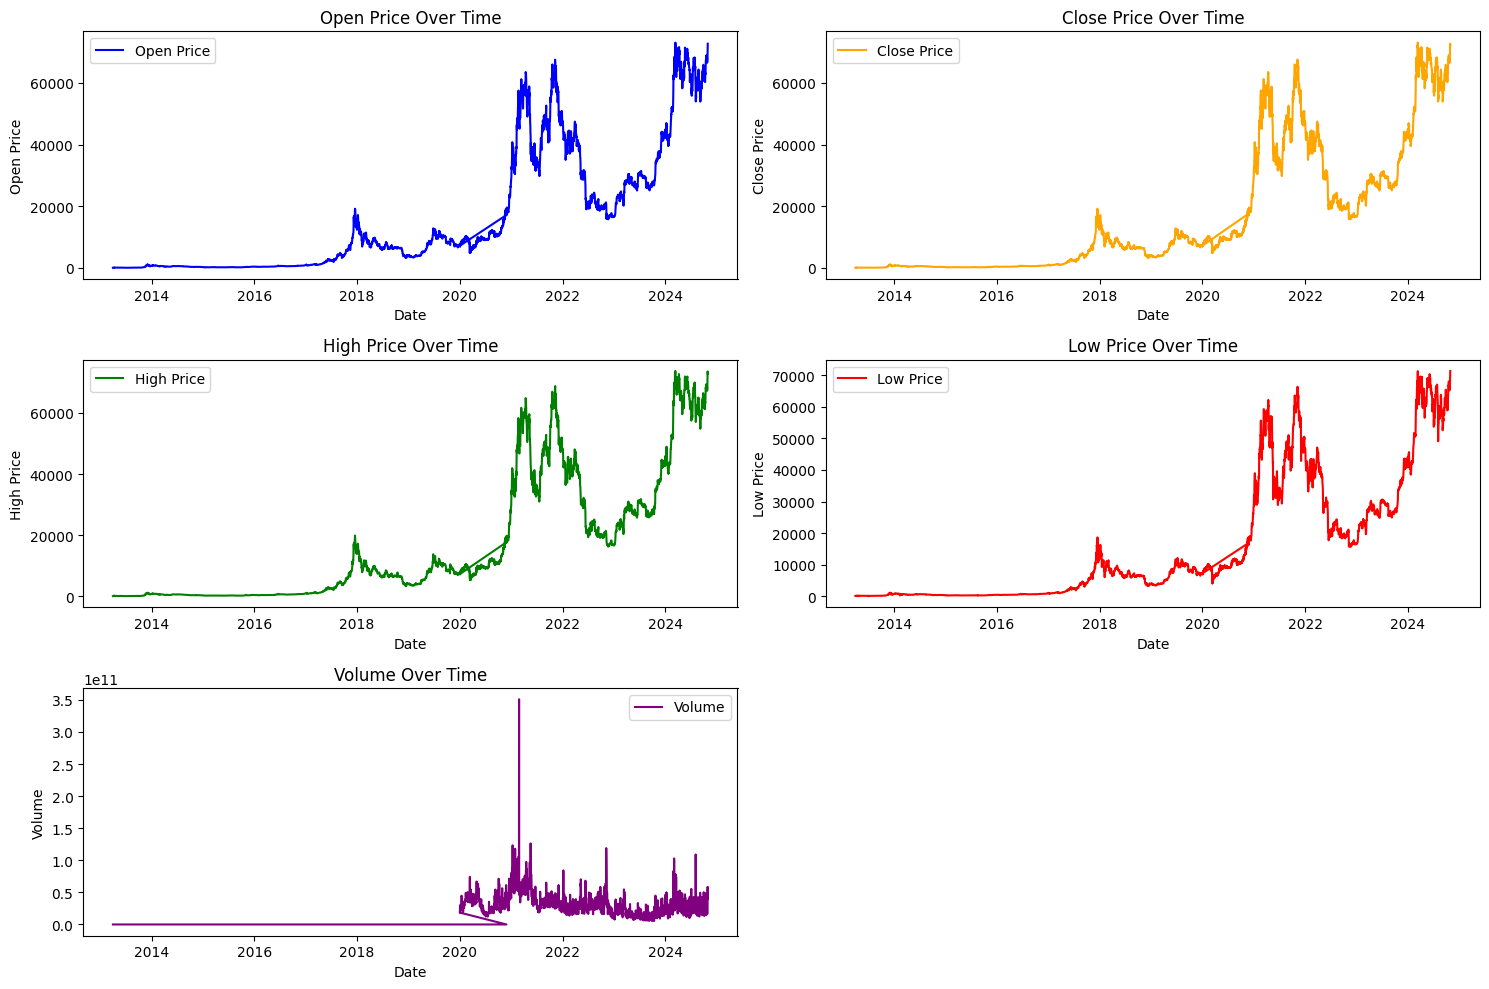

KeyError: "['symbol'] not found in axis"

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))

# Plotting open price
plt.subplot(3, 2, 1)
plt.plot(btc_combined['open'], label='Open Price', color='blue')
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()

# Plotting close price
plt.subplot(3, 2, 2)
plt.plot(btc_combined['close'], label='Close Price', color='orange')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Plotting high price
plt.subplot(3, 2, 3)
plt.plot(btc_combined['high'], label='High Price', color='green')
plt.title('High Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()

# Plotting low price
plt.subplot(3, 2, 4)
plt.plot(btc_combined['low'], label='Low Price', color='red')
plt.title('Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend()

# Plotting volume
plt.subplot(3, 2, 5)
plt.plot(btc_combined['volume'], label='Volume', color='purple')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.show()
btc_combined = btc_combined.drop(columns=['symbol'])

correlation_matrix = btc_combined.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

